# 제5장 빅데이터 시각화와 분석

* 오래전에 공부한 내용을 ipynb형식으로 변경한 것임.

### 한글 형태소 분석
* KoNLPy 패키지는 형태소 분석에 적합하다.

In [ ]:
from konlpy.tag import Kkma

kkma = Kkma()
print(kkma.pos('한국어 형태소 분석은 재미있다.'))

from collections import Counter
pos = kkma.pos('한국어 형태소')
count = Counter(pos)


* Kkma를 계승한 것이 kkma이다.

In [ ]:
from collections import Counter

pos = kkma.pos('한국어 형태소 분석은 재미습니다')
count = Counter(pos)
print(count)

* 맥 환경은 utf-8이 기본 인코딩 방식이지만, 한글 윈도우는 기본 인코딩이 cp949라 utf-8 변환이 필요하다.
* KoNLPy에는 Twitter 형태소 분석기를 내장하고 있다. `from knolpy.tag import Twitter`

### 워드클라우드
* 데이터 시각화에는 Word Cloud / Semantic Analysis(의미망 분석) / ML, DL 등의 기법이 있다.
* 워드클라우드 사용 시 한글 글꼴이 깨지는 경우가 있다. 이럴 경우, 구글이 개발한 NotoSansCJKkrDemiLight와 같이 깨지지 않는 폰트를 사용하면 된다.

### 의미망 분석
* 의미망 분석은 관계망 분석(Network Analysis)의 한 유형이다.
* 관계망이란 행위자를 기본 단위로 연결된 관계를 의미한다.
* 관계망을 통해, 관계의 속성, 대표성 등을 파악할 수 있다.
* 관계망 분석은 사회 연결망 분석Social Network Analysis과 의미망 분석Semantic Analysis로 구분된다. 전자의 행위자는 사람, 단체, 사회 후자의 행위자는 단어, 문구, 문장 등이 된다.

### 관계망
* 관계망에서의 행위자를 노드라 한다.
* 노드와 노드의 관계를 에지edge라 한다.
* 한 노드가 다른 노드를 일방적으로 좇는 경우를 일방향적 관계directional relation, 서로 상호 연결되어 있는 경우 양방향적 관계unidirectional relation라 한다.
* 노드 간의 관계가 밀접하지 않은 Random network / 소수의 중심 노드에서 다른 소규모 노드들이 연결되어 있는 scalefree network / 모든 노드가 서로 연관된 밀접한 small world network 등이 있다.

### 네트워크 중심 측정 방식
1. 연결정도 중심성 Degree Centrality
* 노드에 연결된 다른 노드들의 숫자를 기준으로 연결의 중심을 파악하는 방식
* $\frac{degree}{Max. of degree} = \frac{degree}{n-1}$ degree : 연결정도 수, Max. of degree : 연결될 수 있는 최대 연결 정도, n : 노드 수
  
2. 매개 중심성 Betweenness Centrality
* 노드가 다른 노드 쌍의 경로에 위치한 숫자로 측정된다.
* 즉, 부동산 중개인처럼 구매자와 판매자 사이에 있어 양쪽의 정보를 통제하는 사람이 중요하다는 인식이다.
* $\frac{Between Pairs}{No. of shortest paths} = \frac{Between Pairs}{(n-1)(n-2)/2}$ Between Pairs : 다른 노드 쌍의 경로에 놓인 수, No. of shortest paths : 단순 경로의 수
  
3. 인접 중심성 Close Centrality
* 한 노드에서 다른 노드로 연결되는 데 필요한 경로의 숫자
* 즉, 얼마나 짧게 달느 노드와 연결되어 있어, 정보를 신속하게 전파할 수 있는가로 중심성을 파악하는 방법.

In [2]:
import networkx as nx

g = nx.Graph()

# node
g.add_node(1)
g.add_node(2)
g.add_nodes_from([3, 4, 5, 'six', 'hello'])
g.node[1]['type'] = 'number'

g.nodes()
g.node[1]
g.node[2]
g.nodes(data= True)
len(g)

# edge
g.add_edge(1,2)
g.add_edges_from([(2,3),(3,5),(5,'six')])
g[1][2]['weight'] = 2.3

g.edges()
g.edges(data=True)

AttributeError: 'Graph' object has no attribute 'node'

### NetworkX's Layout
|function|explanaiton|
|---|---|
|circular_layout()|원 위에 놓기|
|spring_layout()|관계가 강할수록 가깝게 놓기|
|spectral_layout()|Laplacian 방식을 이용하여 관계가 강할수록 가깝게 놓기|
|random_layout()|균등하게 놓기|

{1: 0.75, 2: 0.25, 3: 0.5, 4: 0.75, 5: 0.25}
{1: 0.5, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.0}
{1: 0.8, 2: 0.5, 3: 0.6666666666666666, 4: 0.8, 5: 0.5}
[(1, 0.75), (4, 0.75), (3, 0.5)]


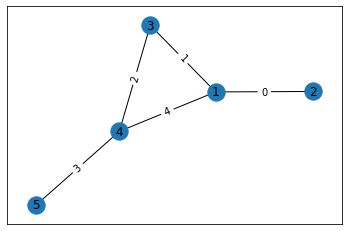

In [5]:
import networkx as nx
import matplotlib.pyplot as plot
from operator import itemgetter

g2 = nx.Graph()

paths = [(1,2), (1,3), (3,4), (4,5), (4,1)] #edge list
for p in paths:
    g2.add_edge(p[0], p[1])

pos = nx.spring_layout(g2)
nx.draw_networkx_nodes(g2, pos)
nx.draw_networkx_edges(g2, pos)

nx.draw_networkx_labels(g2, pos) # 노드에 레이블을 붙임.

edgeLabels = {pair: x for x, pair in enumerate(paths)} #노드 쌍의 위치 값을 레이블 정보로 생성하여 추가
nx.draw_networkx_edge_labels(g2, pos, edge_labels = edgeLabels) # 에지에 레이블을 붙임.

plot.savefig('network_eg01.png')
#plot.axis('off') X축, Y축 생략
plot.close

print('중심성 수치')
print(nx.degree_centrality(g2))
print(nx.betweenness_centrality(g2))
print(nx.closeness_centrality(g2))

print('정렬하기')
degree_cent = nx.degree_centrality(g2)
degree_sorted = sorted(degree_cent.items(), key=itemgetter(1), reverse=True)
print(degree_sorted[0:3])

### operator/ itemgetter
* sorted 함수로 정렬할 수 있으나, 사전 자료의 경우, key를 기준으로 정렬할 것인지, value를 기준으로 정렬할 것인지 설정해야한다.
* 관계망의 중심성 수치는 사전형( {노드:중심성수치} )으로 되어있다. 어떤 것을 기준으로 정렬할지 결정하려면 itemgetter 함수가 적절하다.
* 위에선, itemgetter(0)의 경우 노드를 기준으로 정렬하며, itemgetter(1)의 경우 중심성 수치를 기준으로 정렬한다.